In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')


In [6]:
# Load the dataset
data = pd.read_csv('/content/University Students Monthly Expenses.csv')


In [10]:
# Visualizing the first few rows
print(data.head())

    Gender  Age  Study_year  Living Scholarship Part_time_job Transporting  \
0  Female    21         2.0    Home          No            No           No   
1    Male    25         3.0  Hostel          No           Yes   Motorcycle   
2    Male    23         2.0    Home         Yes            No           No   
3    Male    19         3.0  Hostel          No            No   Motorcycle   
4  Female    19         2.0    Home          No            No   Motorcycle   

  Smoking Drinks Games_&_Hobbies Cosmetics_&_Self-care Monthly_Subscription  \
0      No     No              No                   Yes                   No   
1      No     No             Yes                   Yes                  Yes   
2      No     No              No                    No                  NaN   
3      No     No             Yes                   Yes                  Yes   
4      No     No              No                   Yes                   No   

   Monthly_expenses_$  
0               150.0  
1       

In [11]:
# Checking for missing values
print(data.isnull().sum())

# Handling missing values - Example
# data.fillna(method='ffill', inplace=True)

# Checking for imbalance in categorical features
print(data['Gender'].value_counts())

Gender                    0
Age                       0
Study_year                4
Living                    2
Scholarship               0
Part_time_job             5
Transporting             14
Smoking                  11
Drinks                   13
Games_&_Hobbies           0
Cosmetics_&_Self-care    13
Monthly_Subscription      9
Monthly_expenses_$        6
dtype: int64
Female     53
Male       52
Name: Gender, dtype: int64


In [13]:
# Identify categorical columns
categorical_cols = ['Gender', 'Living', 'Scholarship', 'Part_time_job', 'Transporting', 'Smoking', 'Drinks', 'Games_&_Hobbies', 'Cosmetics_&_Self-care', 'Monthly_Subscription']

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols)

# Display the encoded data
print(data_encoded.head())


   Age  Study_year  Monthly_expenses_$  Gender_Female   Gender_Male   \
0   21         2.0               150.0               1             0   
1   25         3.0               220.0               0             1   
2   23         2.0               180.0               0             1   
3   19         3.0               200.0               0             1   
4   19         2.0               300.0               1             0   

   Living_Home  Living_Hostel  Scholarship_No  Scholarship_Yes  \
0            1              0               1                0   
1            0              1               1                0   
2            1              0               0                1   
3            0              1               1                0   
4            1              0               1                0   

   Part_time_job_No  ...  Smoking_No  Smoking_Yes  Drinks_No  Drinks_Yes  \
0                 1  ...           1            0          1           0   
1                 

In [15]:
# Splitting the dataset into features and target variable
X = data.drop('Monthly_expenses_$', axis=1)
y = data['Monthly_expenses_$']

In [17]:
# Splitting the dataset into the Training set and Test set
X = data_encoded.drop('Monthly_expenses_$', axis=1)
y = data_encoded['Monthly_expenses_$']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: ignored

In [ ]:
# Fill NaN values with the mean for numerical columns and the mode for categorical columns
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        # For categorical columns, fill with the most frequent value
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)
        X_test[col].fillna(X_test[col].mode()[0], inplace=True)
    else:
        # For numerical columns, fill with the mean value
        X_train[col].fillna(X_train[col].mean(), inplace=True)
        X_test[col].fillna(X_test[col].mean(), inplace=True)


In [ ]:
# Fill NaN values in the target variable
y_train.fillna(y_train.mean(), inplace=True)
y_test.fillna(y_test.mean(), inplace=True)


In [ ]:
param_grid_lr = {'fit_intercept': [True, False]}
grid_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

# Best parameters
print("Best parameters for Linear Regression:", grid_lr.best_params_)


Best parameters for Linear Regression: {'fit_intercept': True}


In [ ]:
# Decision Tree Regressor with GridSearchCV
param_grid_dt = {'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

# Best parameters
print("Best parameters for Decision Tree Regressor:", grid_dt.best_params_)


Best parameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_split': 2}


In [ ]:
# Random Forest Regressor with GridSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=0), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best parameters for Random Forest Regressor:", grid_rf.best_params_)


Best parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}


In [ ]:
# SVR with GridSearchCV
param_grid_svr = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
grid_svr = GridSearchCV(SVR(), param_grid_svr, cv=5)
grid_svr.fit(X_train, y_train)

# Best parameters
print("Best parameters for SVR:", grid_svr.best_params_)


Best parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# KNN Regressor with GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

# Best parameters
print("Best parameters for KNN Regressor:", grid_knn.best_params_)


Best parameters for KNN Regressor: {'n_neighbors': 7, 'weights': 'distance'}


In [ ]:
# XGBoost Regressor with GridSearchCV
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}
grid_xgb = GridSearchCV(XGBRegressor(random_state=0), param_grid_xgb, cv=5)
grid_xgb.fit(X_train, y_train)

# Best parameters
print("Best parameters for XGBoost Regressor:", grid_xgb.best_params_)


Best parameters for XGBoost Regressor: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# Predictions
y_pred_lr = grid_lr.predict(X_test)
y_pred_dt = grid_dt.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)
y_pred_svr = grid_svr.predict(X_test)
y_pred_knn = grid_knn.predict(X_test)
y_pred_xgb = grid_xgb.predict(X_test)

# Evaluate models
eval_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVR', 'KNN', 'XGBoost'],
    'MSE': [
        mean_squared_error(y_test, y_pred_lr),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
        mean_squared_error(y_test, y_pred_svr),
        mean_squared_error(y_test, y_pred_knn),
        mean_squared_error(y_test, y_pred_xgb)
    ],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf),
        r2_score(y_test, y_pred_svr),
        r2_score(y_test, y_pred_knn),
        r2_score(y_test, y_pred_xgb)
    ]
}

# Create a DataFrame for evaluation metrics
df_metrics = pd.DataFrame(eval_metrics)
print(df_metrics)


               Model          MSE  R2 Score
0  Linear Regression  3132.758501  0.146661
1      Decision Tree   949.447434  0.741378
2      Random Forest  1063.985397  0.710179
3                SVR  3386.120041  0.077648
4                KNN   706.523283  0.807549
5            XGBoost   601.749329  0.836088


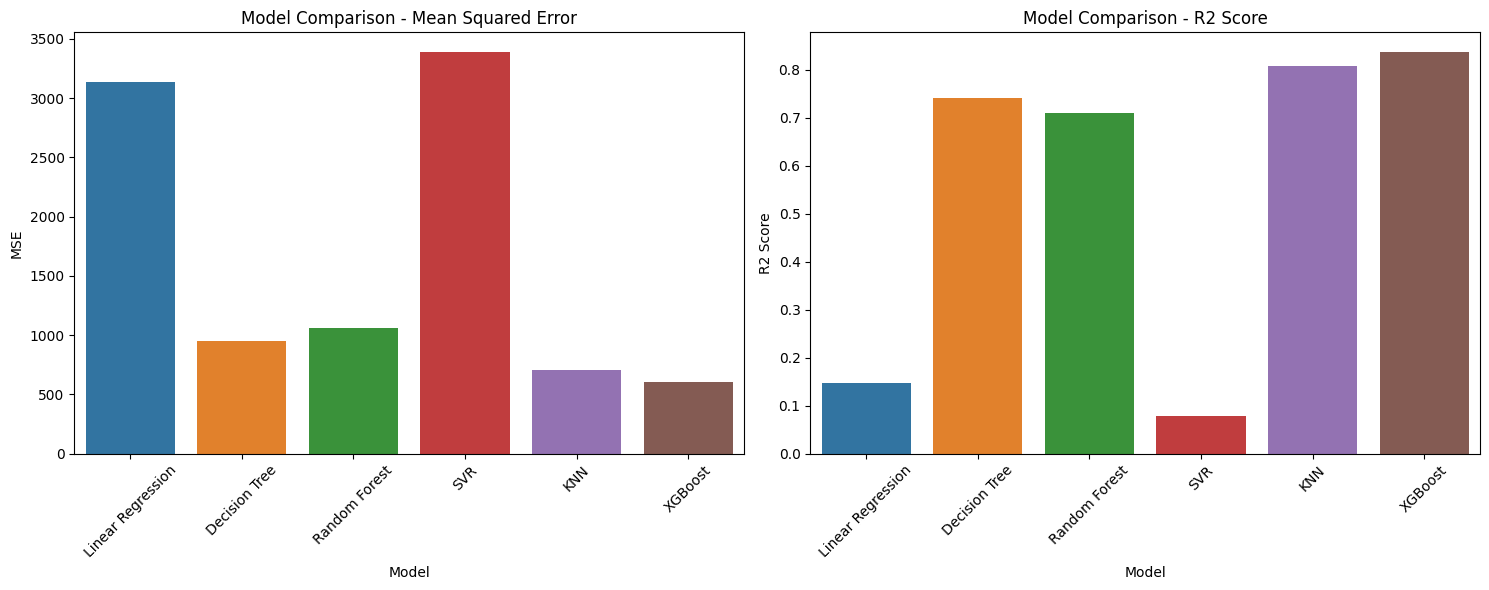

In [ ]:
# Plotting MSE and R2 Score for each model
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# MSE Plot
sns.barplot(x='Model', y='MSE', data=df_metrics, ax=ax[0])
ax[0].set_title('Model Comparison - Mean Squared Error')
ax[0].set_xticklabels(df_metrics['Model'], rotation=45)

# R2 Score Plot
sns.barplot(x='Model', y='R2 Score', data=df_metrics, ax=ax[1])
ax[1].set_title('Model Comparison - R2 Score')
ax[1].set_xticklabels(df_metrics['Model'], rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'df_metrics' contains the R² scores for each model

# Find the model with the highest R² score
best_model_name = df_metrics.loc[df_metrics['R2 Score'].idxmax(), 'Model']

# Determine the best model based on its name
if best_model_name == 'Linear Regression':
    best_model = grid_lr
elif best_model_name == 'Decision Tree':
    best_model = grid_dt
elif best_model_name == 'Random Forest':
    best_model = grid_rf
elif best_model_name == 'SVR':
    best_model = grid_svr
elif best_model_name == 'KNN':
    best_model = grid_knn
elif best_model_name == 'XGBoost':
    best_model = grid_xgb

print(f"The best model based on R² score is: {best_model_name}")


The best model based on R² score is: XGBoost


In [ ]:
def ask_input(prompt, options=None):
    while True:
        response = input(prompt)
        if options and response not in options.keys():
            print(f"Please enter one of the following options: {', '.join([f'{k} for {v}' for k, v in options.items()])}")
            continue
        return response if not options else options[response]

# Collecting user inputs
name = input("Enter your name: ")
gender = ask_input("Press 1 for Male, 2 for Female: ", {'1': 'Male', '2': 'Female'})
age = int(ask_input("Enter age: "))
study_year = int(ask_input("Enter study year (e.g., 1, 2, 3, etc.): "))
living = ask_input("Press 1 for Home, 2 for Hostel: ", {'1': 'Home', '2': 'Hostel'})
scholarship = ask_input("Do you have a scholarship? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})
part_time_job = ask_input("Do you have a part-time job? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})
transporting = ask_input("Mode of transportation - Press 1 for No, 2 for Motorcycle, 3 for Other: ", {'1': 'No', '2': 'Motorcycle', '3': 'Other'})
smoking = ask_input("Do you smoke? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})
drinks = ask_input("Do you consume alcoholic drinks? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})
games_hobbies = ask_input("Do you spend on games & hobbies? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})
cosmetics_self_care = ask_input("Do you spend on cosmetics & self-care? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})
monthly_subscription = ask_input("Do you have monthly subscriptions? Press 1 for Yes, 2 for No: ", {'1': 'Yes', '2': 'No'})

# Preparing the input data for prediction
user_input = {
    'Gender': gender,
    'Age': age,
    'Study_year': study_year,
    'Living': living,
    'Scholarship': scholarship,
    'Part_time_job': part_time_job,
    'Transporting': transporting,
    'Smoking': smoking,
    'Drinks': drinks,
    'Games_&_Hobbies': games_hobbies,
    'Cosmetics_&_Self-care': cosmetics_self_care,
    'Monthly_Subscription': monthly_subscription
}

# Predicting the expenses
predicted_expense = predict_expenses(best_model, user_input)
print(f"{name}, your predicted monthly expenses are: ${predicted_expense:.2f}")

# Proceed to the next step (plotting the analysis)


Enter your name: Soham
Press 1 for Male, 2 for Female: 1
Enter age: 21
Enter study year (e.g., 1, 2, 3, etc.): 3
Press 1 for Home, 2 for Hostel: 2
Do you have a scholarship? Press 1 for Yes, 2 for No: 2
Do you have a part-time job? Press 1 for Yes, 2 for No: 2
Mode of transportation - Press 1 for No, 2 for Motorcycle, 3 for Other: 1
Do you smoke? Press 1 for Yes, 2 for No: 1
Do you consume alcoholic drinks? Press 1 for Yes, 2 for No: 1
Do you spend on games & hobbies? Press 1 for Yes, 2 for No: 2
Do you spend on cosmetics & self-care? Press 1 for Yes, 2 for No: 1
Do you have monthly subscriptions? Press 1 for Yes, 2 for No: 2
Soham, your predicted monthly expenses are: $119.96
